In [1]:
# Total Marks: 2
# Task1: Anomaly Detection Method 1 For Phishing or Malicious URL Detection
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
data=pd.read_csv('UNSW_NB15_training-set.csv')
data.head()
labels=data['label']


In [2]:
from sklearn.preprocessing import LabelEncoder
inliers = data[data['label']==0]
inl = inliers.drop(['label'], axis=1)
outliers = data[data['label']==1]
out = outliers.drop(['label'], axis=1)
inl1=inl.apply(LabelEncoder().fit_transform)
out1=out.apply(LabelEncoder().fit_transform)

In [3]:
def normal_accuracy(values):
    tp=list(values).count(1)
    total=values.shape[0]
    accuracy=np.round(tp/total,4)
    return accuracy

def attack_accuracy(values):
    tn=list(values).count(-1)
    total=values.shape[0]
    accuracy=np.round(tn/total,4)
    return accuracy

In [4]:
from sklearn.ensemble import IsolationForest as IF
ifmodel = IF()
ifmodel.fit(inl1)
normal_isf = ifmodel.predict(inl1)
fraud_isf = ifmodel.predict(out1)
ifin_accuracy_isf=normal_accuracy(normal_isf)
ifout_accuracy_isf=attack_accuracy(fraud_isf)


In [5]:
# Total Marks: 2

# Task1: Analysis of Anomaly Detection Method 1 For Phishing or Malicious URL Detection

print("Accuracy in Detecting Normal Cases:", ifin_accuracy_isf)
print("Accuracy in Detecting Fraud Cases:", ifout_accuracy_isf)





'''
The AUC is high because of ....
'''

Accuracy in Detecting Normal Cases: 0.8568
Accuracy in Detecting Fraud Cases: 0.7285


'\nThe AUC is high because of ....\n'

In [10]:
# Task1: Analysis of Anomaly Detection Method 1 For Probing Dataset
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
model=DecisionTreeClassifier(
            criterion = "entropy", random_state = 5,
            max_depth = 3, min_samples_leaf = 5)
df=data.apply(LabelEncoder().fit_transform)
x_train, x_test,y_train,y_test=train_test_split(df.drop(['label'], axis=1), df['label'],test_size=0.2,random_state=5)
x_train=imp.fit_transform(x_train)
x_test=imp.fit_transform(x_test)
model=model.fit(x_train,y_train)

In [11]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7462
           1       1.00      1.00      1.00      9005

    accuracy                           1.00     16467
   macro avg       1.00      1.00      1.00     16467
weighted avg       1.00      1.00      1.00     16467



In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn=knn.fit(x_train,y_train)
y_pred2=knn.predict(x_test)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7462
           1       0.99      0.96      0.97      9005

    accuracy                           0.97     16467
   macro avg       0.97      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467



In [13]:
# Total Marks: 2

# Task1: Anomaly Detection Method 2 For Phishing or Malicious URL Detection

from sklearn.neighbors import LocalOutlierFactor as LOF
import warnings
warnings.filterwarnings('ignore')
lofmodel = LOF(novelty=True)
lofmodel.fit(inl1)

normal_lof = lofmodel.predict(inl1)
fraud_lof = lofmodel.predict(out1)

in_accuracy_lof=normal_accuracy(normal_lof)
out_accuracy_lof=attack_accuracy(fraud_lof)






In [14]:
# Total Marks: 2

# Task1: Analysis of Anomaly Detection Method 2 For Phishing or Malicious URL Detection

print("Accuracy in Detecting Normal Cases:", in_accuracy_lof)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_lof)







Accuracy in Detecting Normal Cases: 0.9688
Accuracy in Detecting Fraud Cases: 0.9924


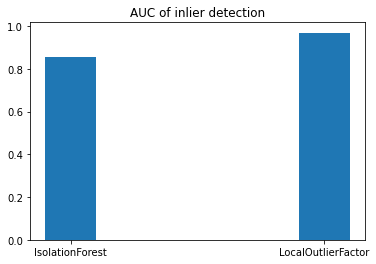

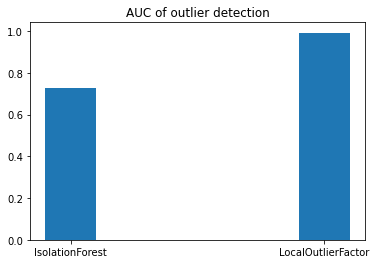

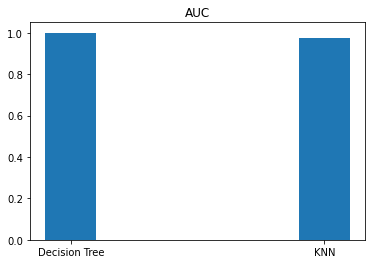

In [15]:
# Total Marks: 2
# Task1: Comparison of Anomaly Detection Method 1 and Method 2 For Phishing or Malicious URL Detection


import matplotlib.pyplot as plt
plt.bar(["IsolationForest","LocalOutlierFactor"],[ifin_accuracy_isf,in_accuracy_lof],width=0.2)
plt.title("AUC of inlier detection")
plt.show()
plt.bar(["IsolationForest","LocalOutlierFactor"],[ifout_accuracy_isf,out_accuracy_lof],width=0.2)
plt.title("AUC of outlier detection")
plt.show()



